# Assigment, transient groundwater 2019

#### Name: Zhechen Zhang 

#### Student number: 107448

#### Locker number: 336

#### E-mail: zzh001@un-ihe.org


# 1. Introduction

For the residents of a nearby small town, a water company collects water from a small river to process it and distribute it as drinking water. That is not a winter issue. Nevertheless, due to increased demand for drinking water and rising environmental concerns, extraction has become increasingly problematic during summers when this small river's discharge is at its lowest. Recently, the environmental agency has banned further extraction of river water during the summer months. The drinking water corporation has proposed an "Aquifer Storage and Recovery Program" to solve the problem that this poses for the drinking water supply. During winter, it wants to take in more river water and pump it into the local water table aquifer through a well (or wells) some distance from the river, so that this water can be drained in the next summer. During the summer months, no water-intake will be required. Nonetheless, the dispute that took off between the water company and the environmental authority centers on whether this ASR program makes sense, or to what degree it does. I will address this question to see if the system can work, and to determine the proper location of the well.

# 2. Method

I solve this problem step by step. First, it should be a steady flow, while I can understand how the transient flow work. SO my first step is transient flow with one well. And then the second one is adding a mirror well to make the boundary of the river. The third step is the superposition of time. Finally, compute extraction for all river-bank points and conclude the proper distance of well.

As we have known, Theis' well function has two variations, the distance x, and the time t. It means the drawdown s is related to both x and t. If we want to make a figure of s, it should be a 3D figure, because s changes with both x and t changing. In this report, we make an s-t figure with some discrete x and s-x figure with some separate t to visualize the results.
## 2.1 One well with a constant discharge


### 2.1.1 Drawndown of the actual well
Use Theis' well function to compute drawdowns:
$$ s(x, t) =\frac  Q {4 \pi kD} W(u), \,\,\,\,\ W(u) =  -scipy.special.exp1(u),\,\,\,\,\, u =\frac {x^2 S} {4 kD t} $$






In [39]:
#loading required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import exp1 as W

In [40]:
# Convenience function for a graph
def newfig(title='forgot title?', xlabel='forgot xalbel?', ylabel='forgot ylabel?', xlim=None, ylim=None,
           xscale='linear', yscale='linear', size_inches=(12, 6)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if not xlim is None: ax.set_xlim(xlim)
    if not ylim is None: ax.set_ylim(ylim)
    ax.grid()
    return ax

In [41]:
# constent for this model
kD=900
S=0.2
xw=-500
yw=0
x1,y1=xw,0
x2=-x1
y2=y1
Q1=-1500
Q2=-Q1
ayear=365.25

hallo world


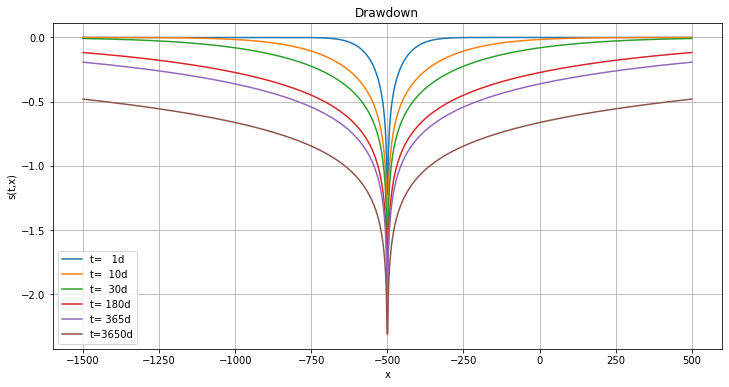

In [42]:
times=[1,10,30,180,365,3650]
x=np.linspace(-1500,500,1000)
y=np.zeros_like(x)
ax=newfig('Drawdown','x','s(t,x)')
for t in times:
    r1=np.sqrt((x-x1)**2+(y-y1)**2)
  
    u1=r1**2*S/(4*kD*t)
    s=Q1/(4*np.pi*kD)*W(u1)
    ax.plot(x,s,label=f't={t:4g}d')
ax.legend()
print("hallo world")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


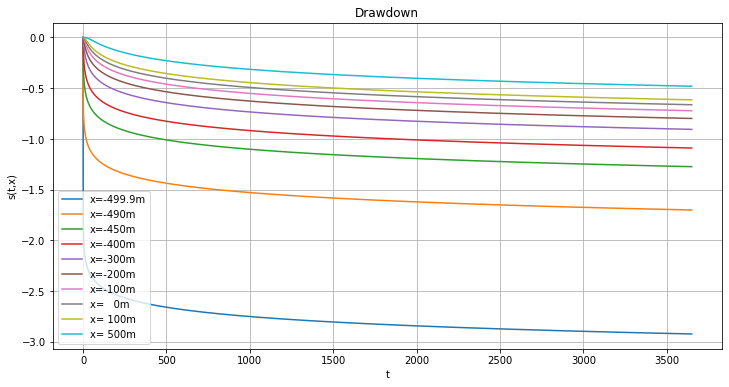

In [43]:
t=np.linspace(0,3650,3651)
xs=[-499.9,-490,-450,-400,-300,-200,-100,0,100,500]
y=0
ax=newfig('Drawdown','t','s(t,x)')
for x in xs:
    r1=np.sqrt((x-x1)**2+(y-y1)**2)  
    u1=r1**2*S/(4*kD*t)
    s=Q1/(4*np.pi*kD)*W(u1)
    ax.plot(t,s,label=f'x={x:4g}m')
ax.legend()

## 2.2 With river boundary(adding a mirror well)



Due to the river boundary, add a mirror well. For making the drawdown at the river-band is always 0, add a mirror well at the same distance on the other side of the river. And this mirror well should have an opposite flow direction with the actual well with the same value. If actual well  Q=500m3/d, the mirror well Q=-500m3/d

### 2.2.1 Drawdown for two wells

Adding a mirror well, and then make superposition for these two wells
The function is as follows:
$$s=s1+s2=\frac  Q {4 \pi kD} (W(u1)+ W(u2)), \,\,\,\,\  u =\frac {x^2 S} {4 kD t} $$

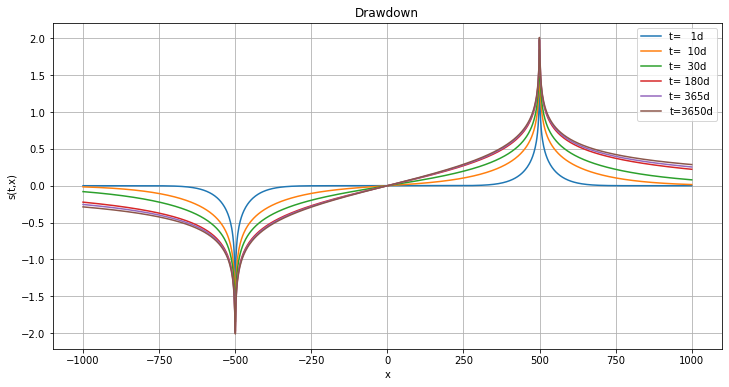

In [44]:
times=[1,10,30,180,365,3650]
x=np.linspace(2*xw,-2*xw,1000)
y=np.zeros_like(x)
ax=newfig('Drawdown','x','s(t,x)')
for t in times:
    r1=np.sqrt((x-x1)**2+(y-y1)**2)
    r2=np.sqrt((x-x2)**2+(y-y2)**2)

    u1=r1**2*S/(4*kD*t)
    u2=r2**2*S/(4*kD*t)
    s=Q1/(4*np.pi*kD)*W(u1)+Q2/(4*np.pi*kD)*W(u2)
    ax.plot(x,s,label=f't={t:4g}d')
ax.legend()

### 2.2.2 Specific discharge for two wells

The specific discharge is the discharge per length, in this case, we focus on the specific discharge at the river-band. The direction of discharge at the river is perpendicular to the river. So we just need the direction of x axis(let the well at x-sxis and the river as y-axis) after calculate the whole discharge.
For a point from a well the specific discharge is equal to the discharge over the length of the circle with radius r:
$$ q_x = q \frac {x - x_w}{r}$$
$$ q_y = q \frac {y - y_w}{r}$$
So we can calculate the specific discharge everywhere and can describle the flow net using these points.

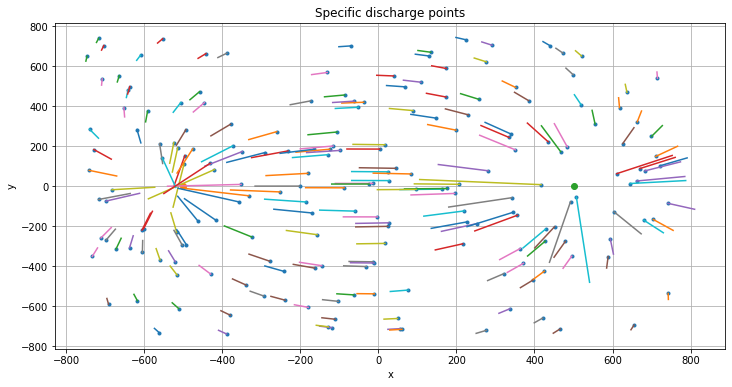

In [46]:
#specific discharge arbirary points
x=(np.random.rand(200)-0.5)*3*xw
y=(np.random.rand(200)-0.5)*3*xw

ax = newfig('Specific discharge points','x','y')
ax.plot(x,y,'.')
ax.plot(x1,y1,'o')
ax.plot(x2,y2,'o')

r1=np.sqrt((x-x1)**2+(y-y1)**2)
r2=np.sqrt((x-x2)**2+(y-y2)**2)
    
q1=Q1/(2*np.pi*r1)
q2=Q2/(2*np.pi*r2)

qx1=q1*(x1-x)/r1
qx2=q2*(x1-x)/r2
qy1=q1*(y1-y)/r1
qy2=q1*(y2-y)/r1

qx=q1*(x-x1)/r1+q2*(x-x2)/r2
qy=q1*(y-y1)/r1+q2*(y-y2)/r2

a=100
for i,(xi,yi) in enumerate(zip(x,y)):
    ax.plot([xi,xi+a*qx[i]],[yi,yi+a*qy[i]])

### 2.2.3 Total extraction

The total flow from the river is calulated by intergrating the specific discharge (at x=axis) along the river(y-axis).
We already have the specific discharge at every position at the river. But we just have some discrete positions. So we can simplise this model by multiplying the inflow value with the length and then summing it all. So the total discharge :
$$Q_{intot} = \intop_{-\infty}^{+\infty} q_x(y) dy \approx \sum_{all\, y} q_x(y) * \Delta y $$
In this part T get two figures. The first one is decribing total discharge at different time after pimping over -3500<y<3500. The second one is total discarge versus time. 

At time=0.1d,Qintot=   -0m3/d
At time=1.0d,Qintot=   -0m3/d
At time=10.0d,Qintot= -143m3/d
At time=30.0d,Qintot= -504m3/d
At time=180.0d,Qintot=-1041m3/d
At time=365.0d,Qintot=-1171m3/d
At time=1000.0d,Qintot=-1281m3/d


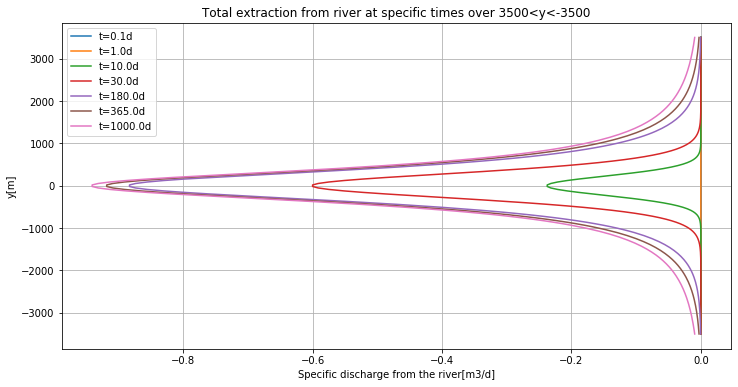

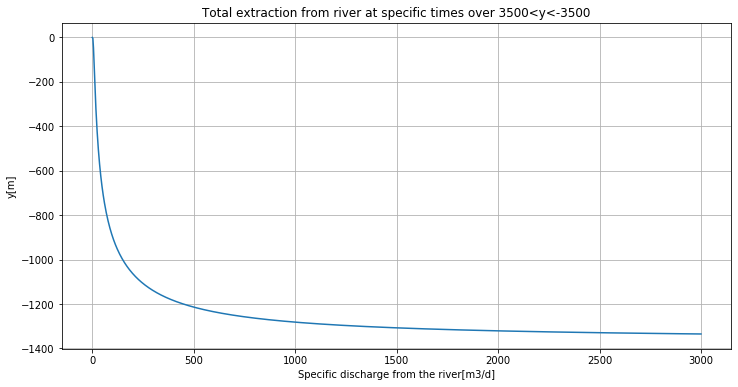

In [47]:
#inflow trasient

y=np.linspace(-7*xw,7*xw,200)
x=np.zeros_like(y)

ax = newfig(f'Total extraction from river at specific times over {y[0]:.0f}<y<{y[-1]:.0f}','Specific discharge from the river[m3/d]','y[m]')

r1=np.sqrt((x-x1)**2+(y-y1)**2)
r2=np.sqrt((x-x2)**2+(y-y2)**2)

times=[0.1,1,10,30,180,365,1000]
Qintt=np.zeros_like(times)
for i,t in enumerate(times):
    u1=r1**2*S/(4*kD*t)
    u2=r2**2*S/(4*kD*t)

    q1=Q1*np.exp(-u1)/(2*np.pi*r1)
    q2=Q2*np.exp(-u2)/(2*np.pi*r2)

    qx=q1*(x-x1)/r1+q2*(x-x2)/r2
    qy=q1*(y-y1)/r1+q2*(y-y2)/r2

    ax.plot(qx,y,label=f't={t:.1f}d')  

    dy=np.diff(y)
    Qintt[i] = -np.sum(0.5*dy*qx[:-1]+0.5*dy*qx[1:])
    print(f'At time={t:2.1f}d,Qintot={Qintt[i]:5.0f}m3/d')
ax.legend()



#Total extraction from the river versus time over -3500<y<3500
ax = newfig(f'Total extraction from river at specific times over {y[0]:.0f}<y<{y[-1]:.0f}','Specific discharge from the river[m3/d]','y[m]')
times2 = np.linspace(0,3000,1001)
times2[0]=0.001
Qintt=np.zeros_like(times2)
for i,t in enumerate(times2):
    u1=r1**2*S/(4*kD*t)
    u2=r2**2*S/(4*kD*t)

    q1=Q1*np.exp(-u1)/(2*np.pi*r1)
    q2=Q2*np.exp(-u2)/(2*np.pi*r2)

    qx=q1*(x-x1)/r1+q2*(x-x2)/r2
    qy=q1*(y-y1)/r1+q2*(y-y2)/r2

    dy=np.diff(y)
    Qintt[i] = -np.sum(0.5*dy*qx[:-1]+0.5*dy*qx[1:])
ax.plot(times2,Qintt)


### 2.3 Superposition in time

Because this is a ASM system, the discharge changes along the time. I need to take superposition in time for complete this model.

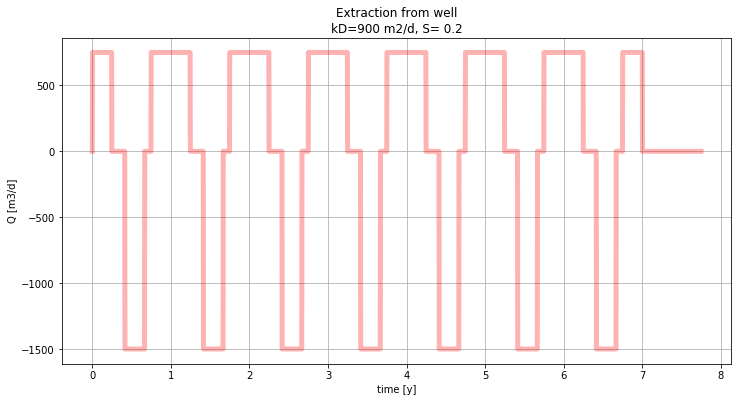

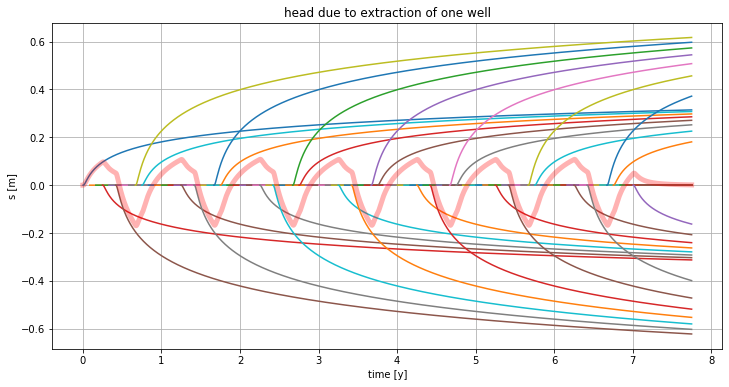

In [48]:
subttl = f'\nkD={kD:.0f} m2/d, S={S:4g}'
time=np.linspace(0,2830,2831)
# Generate two axes for our visualization:
ax0 = newfig(title='Extraction from well' + subttl, xlabel='time [y]', ylabel='Q [m3/d]')
ax1 = newfig(title='head due to extraction of one well',
             xlabel='time [y]', ylabel='s [m]')

xp, yp = 0., 0.    # The coordinates of the observation point
r = np.sqrt((xw - xp) ** 2 + (yw - yp) ** 2) # Distance between well and observation point

s = np.zeros_like(time) # Initialize the head to all zeros
Q = np.zeros_like(time) # Same for the discharge

# Loop over all wells in the well data DataFrame
for iw in range(len(welldata)):  # iw is the line number in the DataFrame
    dQ, tch = welldata.iloc[iw][['dQ', 'tch']]  # From this line select flow change dQ and change time tch
    u = r ** 2 * S / (4 * kD * (time[time > tch] - tch))
    ds = dQ/(4 * np.pi * kD) * W(u) # head change due to this single dQ
    Q[time > tch] += dQ  # Add this dQ to all times > tch
    ax1.plot(time[time > tch] / ayear, ds) # plot ds versus time for t > tch
    s[time > tch] += ds # Add this contribution to the total hean change
ax0.plot(time / ayear, Q, 'r', lw=5, alpha=0.3, label='total') # plot total Discharge
ax1.plot(time / ayear, s, 'r', lw=5, alpha=0.3, label='total') # Plot overall head change



# 3. Result

## 3.1 Input of ASR


In [49]:
welldata = pd.read_excel('PumpingStationQ.xlsx', sheet_name='Sheet1', parse_dates=True, dayfirst=True, index_col=0)
welldata

,n,month,year,Qfac,Q,dQ,tch
date,,,,,,,
2010-01-01,1,1,2010,0.5,750,750,0
2010-02-01,2,2,2010,0.5,750,0,31
2010-03-01,3,3,2010,0.5,750,0,59
2010-04-01,4,4,2010,0.0,0,-750,90
2010-05-01,5,5,2010,0.0,0,0,120
2010-06-01,6,6,2010,-1.0,-1500,-1500,151
2010-07-01,7,7,2010,-1.0,-1500,0,181
2010-08-01,8,8,2010,-1.0,-1500,0,212
2010-09-01,9,9,2010,0.0,0,1500,243


## 3.2 Drawdown at X axis

I can get the drawdown at specific position. The figure shows the drawndown versus time at different position at the X-axis.

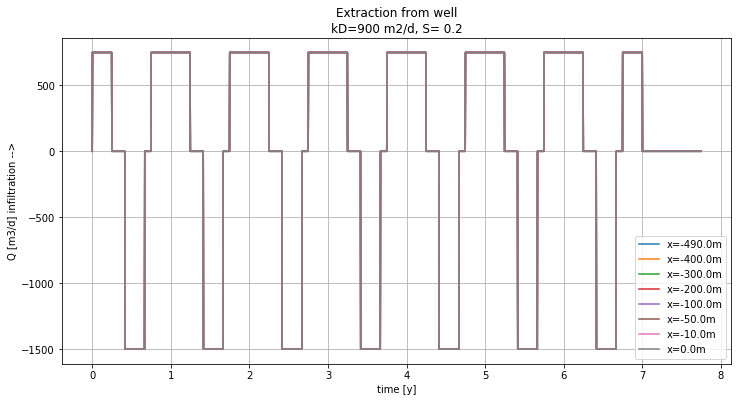

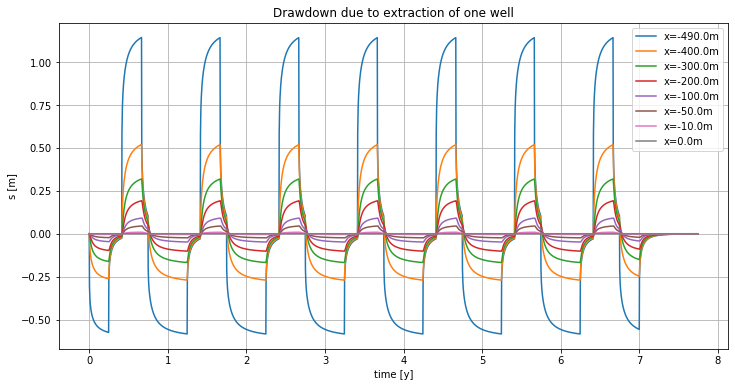

In [21]:
ax0 = newfig(title='Extraction from well' + subttl, xlabel='time [y]',
             ylabel='Q [m3/d] infiltration -->')
ax1 = newfig(title='Drawdown due to extraction of one well',
             xlabel='time [y]', ylabel='s [m]')
s = np.zeros_like(time)
Q = np.zeros_like(time)

xps = [-490,-400,-300,-200,-100,-50,-10,0,] 
yp = 0
for xp in xps:
    r1 = np.sqrt((x1 - xp) ** 2 + (y1 - yp) ** 2)
    r2 = np.sqrt((x2 - xp) ** 2 + (y2 - yp) ** 2)
    s = np.zeros_like(time)
    Q = np.zeros_like(time)
    for iw in range(len(welldata)):
        dQ, tch = welldata.iloc[iw][['dQ', 'tch']]
        n = np.sum(time > tch)
        u1 = r1 ** 2 * S / (4 * kD * (time[time > tch] - tch))
        u2 = r2 ** 2 * S / (4 * kD * (time[time > tch] - tch))
        Q[time > tch]  += dQ
        ds = -dQ/(4 * np.pi * kD) * (W(u1) - W(u2))
        #ax1.plot(time[time > tch] / ayear, ds)
        s[time > tch] += ds
    ax0.plot(time / ayear, Q, label=f'x={xp:.1f}m')
    ax1.plot(time / ayear, s, label=f'x={xp:.1f}m')
ax0.legend()
ax1.legend()


## 3.3 Exchange between aquifer and river

The figure is the total flow at the river versus time.It is the latest result figure when well at -500m

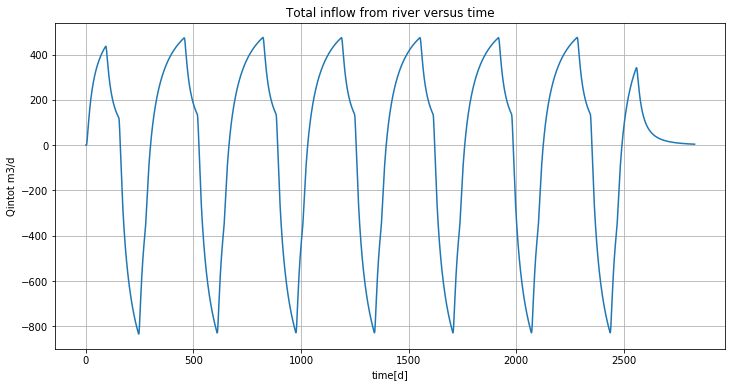

In [30]:
yp=np.linspace(-5*xw,5*xw,200)
xp=np.zeros_like(yp)
Qin=np.zeros((len(yp),len(time)))

for ip, (x,y) in enumerate(zip(xp,yp)):
    r1 = np.sqrt((x1 - x) ** 2 + (y1 - y) ** 2)
    r2 = np.sqrt((x2 - x) ** 2 + (y2 - y) ** 2)

    
    Q = np.zeros_like(time)
    for iw in range(len(welldata)):
        dQ, tch = welldata.iloc[iw][['dQ', 'tch']]
        n = np.sum(time > tch)
        u1 = r1 ** 2 * S / (4 * kD * (time[time > tch] - tch))
        u2 = r2 ** 2 * S / (4 * kD * (time[time > tch] - tch))
        Q[time > tch]   += dQ
        dQinx = -dQ * (np.exp(-u1)/ (2 * np.pi * r1)*(x-x1)/r1 - np.exp(-u2) / (2 * np.pi * r2)*(x-x2)/r2)
        
        Qin[ip][time > tch] += dQinx
dy=np.diff(yp)[:,np.newaxis]
Qintt=np.sum((Qin[:-1]+Qin[1:])*dy/2,axis=0)

ax = newfig('Total inflow from river versus time','time[d]','Qintot m3/d')
ax.plot(time,Qintt)


# 4. Discussion

## 4.1 For result of Xw=500m

The distance of 500 is not suitable for our request. From the figure of total discharge at river, we can see there much exchange between the aquifer and river. Both pumping  and injection, this system have a much impact on the river. So this distance is too small for this system running without influence on the river.

## 4.2 Select the appropriate distance

Plot six different distances to select the minimum impact distance to the river. We know that the more range the smalle effect on the river. But we still need to consider the economic impact as well as reality. Thus, from the figure, our the environmental group can receive the influence of the distance larger than 2000m

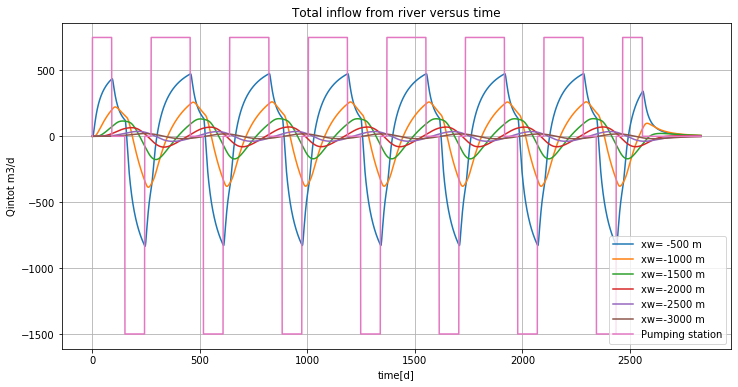

In [50]:
ax = newfig('Total inflow from river versus time','time[d]','Qintot m3/d')
yp=np.linspace(-5*xw,5*xw,200)
xp=np.zeros_like(yp)

#choose differnt values of well position
Xw=[-500,-1000,-1500,-2000,-2500,-3000]
for xw in Xw:
    Qin=np.zeros((len(yp),len(time)))
    x1,y1=xw,0
    x2,y2=-xw,y1
    for ip, (x,y) in enumerate(zip(xp,yp)):
        r1 = np.sqrt((x1 - x) ** 2 + (y1 - y) ** 2)
        r2 = np.sqrt((x2 - x) ** 2 + (y2 - y) ** 2)

        Q = np.zeros_like(time)
        for iw in range(len(welldata)):
            dQ, tch = welldata.iloc[iw][['dQ', 'tch']]
            n = np.sum(time > tch)
            u1 = r1 ** 2 * S / (4 * kD * (time[time > tch] - tch))
            u2 = r2 ** 2 * S / (4 * kD * (time[time > tch] - tch))
            Q[time > tch]   += dQ
            dQinx = -dQ * (np.exp(-u1)/ (2 * np.pi * r1)*(x-x1)/r1 - np.exp(-u2) / (2 * np.pi * r2)*(x-x2)/r2)

            Qin[ip][time > tch] += dQinx
    dy=np.diff(yp)[:,np.newaxis]
    Qintt=np.sum((Qin[:-1]+Qin[1:])*dy/2,axis=0)
    ax.plot(time,Qintt,label=f'xw={xw:5.0f} m')
ax.plot(time,Q,label='Pumping station')
ax.legend()



# 5 Conclusion

The proposed distance of 500m by the water company is absolutely unacceptable. At a distance of 500 meters, the underground aquifer and the river exchange a large amount of water in both winter and summer, not really functioning as an ASR system. We think the ASR system is feasible, but the location of the well must be more than 2000 meters away before it is acceptable. Otherwise, the system will again reduce the amount of water in the river's dry season, harming the ecosystem.